# Main Topics:
- Key differences between Python and Java
    - Key Python utilities (list comprehensions, max, lambdas, functionals, (arg)max)
    - Classes and OOP (self keyword and differences from Java)
- Matrix/Array paradigm
- Common Functions in numpy
    - slicing
    - appending
    - conditional slicing
    - element-wise operations
    - matrix multiplication
- Advantages of numpy
- Common pitfalls with notebooks (importing modified files)

## Format
This notebook will be used as a lecture guide.
iClicker Questions will be used to do checks of:
- What the class knows/is familiar with
- Predicting output of programs
- Random questions (S)am wants answered

___

# Clicker Question 0:
Use your knowledge of decision trees to answer this question!

# Must Know about Python!
- whitespace matters
- no semicolons
- use collections!

In [1]:
iterable = range(10)  # Creates an iterable that goes from 0 to 9
print(iterable)
# dir(iterable)  # Shows what you can do with it.

range(0, 10)


In [2]:
some_list = list(iterable)  # Converts to a list. Python does not use proper 'arrays' naturally.
print(some_list)
some_set = set(iterable)
print(some_set)
some_dict = {i: i*i for i in iterable}  # This is the "List Comprehension" syntax
print(some_dict)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
{0: 0, 1: 1, 2: 4, 3: 9, 4: 16, 5: 25, 6: 36, 7: 49, 8: 64, 9: 81}


In [3]:
print(some_dict[8])

64


In [4]:
l1 = [3, 5, 6, 9]
d1 = {i:i*i for i in l1}
print(d1)

{3: 9, 5: 25, 6: 36, 9: 81}


In [5]:
some_list = [i - 1 for i in range(10) if (i%2 == 0)]
print(some_list)

[-1, 1, 3, 5, 7]


# Clicker Question 1:
Predict the output of the cell below:  
A. [0, 1, 2]  
B. [[0, 1, 2], [0, 1, 2], [0, 1, 2]]  
C. [0, 1, 2, 1, 2, 3, 2, 3, 4]  
D. [[0, 1, 2], [1, 2, 3], [2, 3, 4]]  
E. Error

In [6]:
print([[j for j in range(i, i+3)] for i in range(3)])

[[0, 1, 2], [1, 2, 3], [2, 3, 4]]


In [7]:
data = [(i-5) * (i-5) for i in range(10)]
print(data, " max: ", max(data), ", min: ", min(data))

[25, 16, 9, 4, 1, 0, 1, 4, 9, 16]  max:  25 , min:  0


In [8]:
# Detour into lambdas - Functions can be treated as objects
def function_maker(factor_to_multiply_by):
    return (lambda input_number: factor_to_multiply_by * input_number)

doubler = function_maker(2)
print([doubler(i) for i in range(5)])
tripler = function_maker(3)
print([tripler(i) for i in range(5)])

[0, 2, 4, 6, 8]
[0, 3, 6, 9, 12]


In [9]:
# (arg)min
print(min(range(10), key=lambda value: (value-5.2)*(value-5.2)))
# Python allows named parameters, like 'key' for when there are long lists of optional parameters.
# The lambda object created here is passed as the parameter called "key". See below for a clearer example.

5


In [10]:
data = [5, 0, 4, 7]
print(min(data))

0


In [11]:
print(min(range(len(data)), key=(lambda index: data[index])))

1


In [12]:
# https://docs.python.org/3/tutorial/classes.html

class SimpleClass():
    def __init__(self, input_data):
        self.input_data = input_data
    
    def __str__(self):
        return "SimpleClass String Representation: " + str(self.input_data)
    
    def other_method(self, param1, param2):
        pass  # The pass keyword tells the interpreter that the method isn't supposed to do anything yet.

In [13]:
sc = SimpleClass([i * .5 for i in range(10)])
print(sc)

SimpleClass String Representation: [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5]


In [14]:
# This example was generated in class showing that instance variables can be created on the fly.
# General good practice is to create all the instance variables you will use in __init__.

sc.some_field_that_I_make_up = 5
print(sc.some_field_that_I_make_up)
del(sc.some_field_that_I_make_up)
print(sc.some_field_that_I_make_up)

5


AttributeError: 'SimpleClass' object has no attribute 'some_field_that_I_make_up'

# Clicker Question 2:
Suppose I run this code, and SomeClass exists:  
some_instance = SomeClass()  
print(some_instance.some_method(a, b))  

How many arguments are passed to "some_method"?  
A. 0  
B. 1  
C. 2  
D. 3  
E. 4  

### Post-Class Answer:
There are 3 arguments. There are two that are readily apparent (`a` and `b`), but `some_instance` is actually passed as a first parameter and is bound to `self` in the instance method declaration.  In Python, methods are defined with respect to a class, and the calling instance is passed as a parameter.

___
# Numpy
Time to start thinking in terms of matrices and parallel data.  
There are a few ways to create matrices in Numpy:

In [15]:
import numpy as np

In [16]:
arr1 = np.array([1, 8, 2, 7])
print(arr1.shape)
print(arr1)

(4,)
[1 8 2 7]


In [17]:
arr2 = np.arange(4)  # Note that this is "a. range", not "arrange". Short for "Array Range".
print(arr2.shape)
print(arr2)

(4,)
[0 1 2 3]


# Clicker Question 3
How many rows does arr3 have after running the cell below:  
A. 4  
B. 5  
C. I don't know.  
D. I don't care.  
E. I'm selecting this answer even though I know it's wrong because I've been deceived into thinking being counter-cultural is always a good thing.  

In [18]:
arr3 = np.arange(20).reshape((4,5))
print(arr3.shape)
print(arr3)

(4, 5)
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]


In [19]:
arr4 = np.zeros((4,5))
print(arr4.shape)
print(arr4)

(4, 5)
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


In [20]:
arr4_1 = arr4 + .5
print(arr4_1)
arr4_2 = arr4_1 * 2
print(arr4_2)

[[ 0.5  0.5  0.5  0.5  0.5]
 [ 0.5  0.5  0.5  0.5  0.5]
 [ 0.5  0.5  0.5  0.5  0.5]
 [ 0.5  0.5  0.5  0.5  0.5]]
[[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]]


In [21]:
arr5 = np.ones((5,4))
print(arr5.shape)
print(arr5)

(5, 4)
[[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]


In [22]:
arr6 = np.identity(4)
print(arr6.shape)
print(arr6)

(4, 4)
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]


In [23]:
arr6[1,0] = 42 # We can do assignment to any indexed/sliced submatrix
print(arr6)

[[  1.   0.   0.   0.]
 [ 42.   1.   0.   0.]
 [  0.   0.   1.   0.]
 [  0.   0.   0.   1.]]


# Slicing
Numpy extends the indexing syntax of arrays to allow selection of contiguous submatrices, or even conditional selection.
Numpy also allows appending of matrices.

In [24]:
from sklearn import datasets
from matplotlib import pyplot as plt

In [25]:
iris = datasets.load_iris()
iris_data = iris.data
iris_labels = iris.target
print("Data: ", iris_data.shape)
print("Data Transposed: ", iris_data.T.shape)  # Note the .T used to get the transpose.
print("Labels: ", iris_labels.shape)

Data:  (150, 4)
Data Transposed:  (4, 150)
Labels:  (150,)


In [26]:
# https://docs.scipy.org/doc/numpy-1.13.0/user/basics.indexing.html

# Select only the second 2 features in the middle 50 rows:
subset_data = iris_data[50:100, 2:]
print(subset_data.shape)

(50, 2)


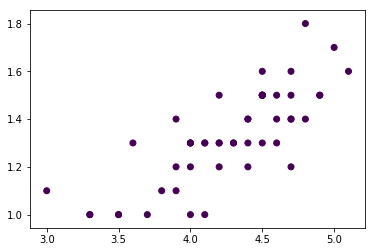

In [27]:
plt.scatter(subset_data[:,0], subset_data[:,1], c=iris_labels[50:100])
plt.show()

(For those with too much time on your hands, you may notice only 36 points, which is not the 50 we sliced. In the iris dataset, measurements were only made to the nearest tenth of a centimeter, leading to some points having identical coordinates in this 2D subspace.)

[0 0 0 0 0 0 1 0 0 1]


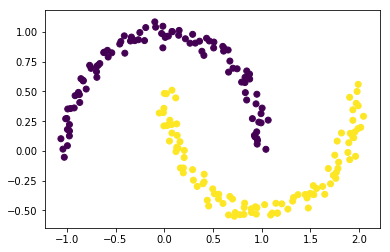

In [28]:
moons_data, moons_labels = datasets.make_moons(n_samples=200, noise=.05)
print(moons_labels[:10])  # The points from the different classes are all mixed up.
plt.scatter(moons_data[:,0], moons_data[:,1], c=moons_labels)
plt.show()

In [29]:
# Let's filter for only one half-circle.  Start by appending labels to data.
print(moons_data.shape)
print(moons_labels.shape)
combined = np.append(moons_data, moons_labels, 1)  # 1 is the dimension along which the appending happens.  0 for rows, 1 for columns.
print (combined.shape)

(200, 2)
(200,)


ValueError: all the input arrays must have same number of dimensions

In [30]:
print(moons_data.shape)
moons_labels = moons_labels.reshape(len(moons_labels), 1)
print(moons_labels.shape)
combined = np.append(moons_data, moons_labels, 1)  # 1 is the dimension along which the appending happens.  0 for rows, 1 for columns.
print (combined.shape)

(200, 2)
(200, 1)
(200, 3)


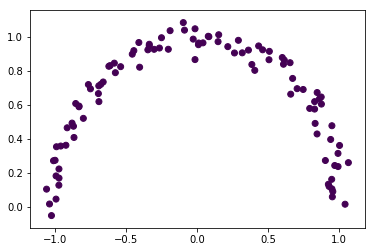

In [31]:
condition = combined[:,2]==0  # This is subtle. First, we select the final column.  Then, an element-wise boolean operation is performed.
circle_0 = combined[condition]
plt.scatter(circle_0[:,0], circle_0[:,1], c=circle_0[:,2])
plt.show()

# Matrix Multiplication!

In [32]:
fib_mat = np.array([[1, 1], [1, 0]])
print(fib_mat)

[[1 1]
 [1 0]]


In [33]:
print(fib_mat @ fib_mat)
print(fib_mat @ fib_mat @ fib_mat)
print(fib_mat @ fib_mat @ fib_mat @ fib_mat)

[[2 1]
 [1 1]]
[[3 2]
 [2 1]]
[[5 3]
 [3 2]]


In [34]:
print(np.linalg.matrix_power(fib_mat, 5))

[[8 5]
 [5 3]]


# Non-Clicker Question:
If we were to write our own fibonacci computing function, what are some things we could do to make it as fast as possible?

In [35]:
def numpy_fib(n):
    return np.linalg.matrix_power(fib_mat, n-1)[0,0]

def by_hand_mat_mult(two_by_two_matrix, two_by_two_matrix_2):
    tbt = two_by_two_matrix
    tbt2 = two_by_two_matrix_2
    return [[tbt[0][0]*tbt2[0][0] + tbt[0][1] * tbt2[1][0], tbt[0][0]*tbt2[0][1] + tbt[0][1] * tbt2[1][1]],
            [tbt[1][0]*tbt2[0][0] + tbt[1][1] * tbt2[1][0], tbt[1][0]*tbt2[0][1] + tbt[1][1] * tbt2[1][1]]]

def by_hand_mat_exp(matr, n):
    if n<=1:
        return matr
    elif n%2==0:
        sub_mat = by_hand_mat_exp(matr, n/2)
        return by_hand_mat_mult(sub_mat, sub_mat)
    else:
        return by_hand_mat_mult(matr, by_hand_mat_exp(matr, n-1))

def by_hand_fib(n):
    return by_hand_mat_exp(fib_mat, n-1)[0][0]

In [36]:
print(numpy_fib(6))
print(by_hand_fib(6))

8
8


In [37]:
# Ignore this - just some timing and utilities:

# Series Statistics: Utilities
def mean_sd_se(list_of_values):
    mean = sum(list_of_values)/max(1, len(list_of_values))
    var = sum([(value - mean)*(value - mean) for value in list_of_values])/max(1, len(list_of_values))
    std_dev = math.sqrt(var)
    std_err = std_dev/math.sqrt(max(1, len(list_of_values)))
    return (mean, std_dev, std_err)

def series_statistics(list_of_lists):
    means = []
    std_devs = []
    std_errs = []
    for list_of_values in list_of_lists:
        (mean, sd, se) = mean_sd_se(list_of_values)
        means.append(mean)
        std_devs.append(sd)
        std_errs.append(se)
    return (means, std_devs, std_errs)

import timeit

index:  2
index:  4
index:  8
index:  16
index:  32
index:  64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in long_scalars
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in long_scalars
  


index:  128
index:  256
index:  512
index:  1024
index:  2048
index:  4096
index:  8192
index:  16384
index:  32768
index:  65536
index:  131072
index:  262144
index:  524288
index:  1048576


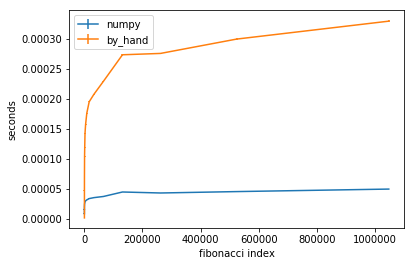

In [38]:
# An experiment to compare the runtime of our implementation vs. the one-line numpy solution.

import math
timings = []
timings_2 = []
indices = [int(math.pow(2,i)) for i in range(1,20+1)]
for index in indices:
    print('index: ', index)
    times = []
    times_2 = []
    for repeat_index in range(10000):
        start_time = timeit.default_timer()
        val = numpy_fib(index)
        elapsed = timeit.default_timer() - start_time
        times.append(elapsed)
        start_time = timeit.default_timer()
        val_2 = by_hand_fib(index)
        elapsed = timeit.default_timer() - start_time
        times_2.append(elapsed)
    timings.append(times)
    timings_2.append(times_2)
(means, sds, ses) = series_statistics(timings)
(means_2, sds_2, ses_2) = series_statistics(timings_2)
plt.errorbar(indices, means, yerr=ses, label='numpy')
plt.errorbar(indices, means_2, yerr=ses_2, label='by_hand')
plt.legend()
plt.ylabel('seconds')
plt.xlabel('fibonacci index')
plt.show()

# Clicker Question 4:
What, if anything should I use numpy for?  
A. Nothing  
B. Everything  
C. Anything involving matrices  
D. Everything involving matrices  
E. What's the difference between C and D?

# Final Note
By default, Python only imports a module once; after that, future imports of the same module have no effect. This can catch you off guard if you are actively modifying a custom module that you import into a notebook. An easy fix is to restart the kernel when you modify an imported file. Alternately, `import importlib` and `importlib.reload(<package_name>)`. By doing most of your development in notebooks and then putting finished work in imported modules, you can have the best of both environments.

Another common issue is modifying one collection and having those changes reflected in a different one (thanks to the person who pointed this out - I forgot to ask your name). This can happen when you have code like the _bottom_ cell below. This can be resolved by using the `copy` library from python (with `copy` or `deepcopy` functions), or by using `np.copy`.

For more common Python "gotcha's", check out http://docs.python-guide.org/en/latest/writing/gotchas/.

In [39]:
import importlib
importlib.reload(np)

<module 'numpy' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\numpy\\__init__.py'>

In [40]:
npmat = np.arange(100).reshape((10,10)) + 1  # Creates table 1-100
npmat_same = npmat
npmat_different = np.copy(npmat)
npmat_extended_different = np.append(npmat, npmat[:,0].reshape((len(npmat), 1)), 1)  # Appending (more columns here), creates a new matrix.
npmat[5:9,5:9]=-1
print(npmat, "original")
print(npmat_same, "assignment")
print(npmat_different, "np.copy")
print(npmat_extended_different, "np.append")

[[  1   2   3   4   5   6   7   8   9  10]
 [ 11  12  13  14  15  16  17  18  19  20]
 [ 21  22  23  24  25  26  27  28  29  30]
 [ 31  32  33  34  35  36  37  38  39  40]
 [ 41  42  43  44  45  46  47  48  49  50]
 [ 51  52  53  54  55  -1  -1  -1  -1  60]
 [ 61  62  63  64  65  -1  -1  -1  -1  70]
 [ 71  72  73  74  75  -1  -1  -1  -1  80]
 [ 81  82  83  84  85  -1  -1  -1  -1  90]
 [ 91  92  93  94  95  96  97  98  99 100]] original
[[  1   2   3   4   5   6   7   8   9  10]
 [ 11  12  13  14  15  16  17  18  19  20]
 [ 21  22  23  24  25  26  27  28  29  30]
 [ 31  32  33  34  35  36  37  38  39  40]
 [ 41  42  43  44  45  46  47  48  49  50]
 [ 51  52  53  54  55  -1  -1  -1  -1  60]
 [ 61  62  63  64  65  -1  -1  -1  -1  70]
 [ 71  72  73  74  75  -1  -1  -1  -1  80]
 [ 81  82  83  84  85  -1  -1  -1  -1  90]
 [ 91  92  93  94  95  96  97  98  99 100]] assignment
[[  1   2   3   4   5   6   7   8   9  10]
 [ 11  12  13  14  15  16  17  18  19  20]
 [ 21  22  23  24  25  26  27  2